<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-February/blob/main/TFOD/Tensorflow_Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.4 kB/s 
     |████████████████████████████████| 438 kB 69.3 MB/s 
     |████████████████████████████████| 5.8 MB 66.1 MB/s 
     |████████████████████████████████| 1.6 MB 44.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [3]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
    print(tf.__version__)
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0
2.9.1


In [4]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 74844, done.
remote: Counting objects: 100% (332/332), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 74844 (delta 188), reused 253 (delta 134), pack-reused 74512
Receiving objects: 100% (74844/74844), 580.52 MiB | 35.84 MiB/s, done.
Resolving deltas: 100% (53082/53082), done.


In [5]:
pwd

'/content'

In [6]:
cd /content/models/research

/content/models/research


In [7]:
# From within TensorFlow/models/research/
!protoc object_detection/protos/*.proto --python_out=.

In [8]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 34.70 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [9]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [10]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7

In [11]:
cp -r pycocotools /content/models/research

In [12]:
pwd

'/content/models/research/cocoapi/PythonAPI'

In [13]:
cd /content/models/research

/content/models/research


In [14]:
cp object_detection/packages/tf2/setup.py .

In [15]:
!python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.9 MB 62.4 MB/s 
     |████████████████████████████████| 352 kB 42.9 MB/s 
     |████████████████████████████████| 2.1 MB 60.9 MB/s 
     |████████████████████████████████| 25.9 MB 1.6 MB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
     |████████████████████████████████| 636 kB 62.7 MB/s 
     |████████████████████████████████| 99 kB 11.7 MB/s 
     |████████████████████████████████| 1.2 MB 53.1 MB/s 
     |█

In [16]:
pwd

'/content/models/research'

In [17]:
cd /content/models/research

/content/models/research


In [18]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-06-30 16:55:59.898817: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0630 16:56:00.134623 140260738529152 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.4s
I0630 16:56:00.506652 140260738529152 test_util.py:2459] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.4s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.74s
I0630 16:56:01.248607 140260738529152 test_uti

In [28]:
cd /content

/content


In [36]:
!python /content/generate_tfrecord.py --csv_input=/content/drive/MyDrive/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10-master/images/train_labels.csv --output_path=train.record --image_dir=/content/drive/MyDrive/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10-master/images/train

Successfully created the TFRecords: /content/train.record


In [37]:
!python /content/generate_tfrecord.py --csv_input=/content/drive/MyDrive/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10-master/images/test_labels.csv --output_path=test.record --image_dir=/content/drive/MyDrive/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10-master/images/test

Successfully created the TFRecords: /content/test.record


In [33]:
cd /content

/content


In [34]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2022-06-30 17:07:28--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.15.80, 2607:f8b0:4004:c09::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.15.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   248MB/s    in 0.9s    

2022-06-30 17:07:29 (248 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



In [35]:
!tar xvf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [38]:
!pip uninstall opencv-python-headless==4.5.5.62

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.6.0.66.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-5896f664.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-d21001fc.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [39]:
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.4 MB/s 


In [40]:
cd /content/models/research/object_detection/

/content/models/research/object_detection


In [43]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 47 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 7s (65.4 MB/s)
(Reading database ... 155639 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155617 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+c

In [50]:
cd /content/models/research/object_detection/

/content/models/research/object_detection


In [52]:
!python model_main_tf2.py --model_dir=/content/my_model --pipeline_config_path=/content/my_model/pipeline.config

2022-06-30 17:29:10.323470: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0630 17:29:10.329030 140121551509376 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0630 17:29:10.332640 140121551509376 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0630 17:29:10.332803 140121551509376 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0630 17:29:10.476330 140121551509376 deprecation.py:356] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experimental

In [46]:
cd /content/my_model

/content/my_model


In [48]:
!tar xvf /content/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
# Create train data:
python generate_tfrecord.py -x [PATH_TO_IMAGES_FOLDER]/train -l [PATH_TO_ANNOTATIONS_FOLDER]/label_map.pbtxt -o [PATH_TO_ANNOTATIONS_FOLDER]/train.record

# Create test data:
python generate_tfrecord.py -x [PATH_TO_IMAGES_FOLDER]/test -l [PATH_TO_ANNOTATIONS_FOLDER]/label_map.pbtxt -o [PATH_TO_ANNOTATIONS_FOLDER]/test.record

# For example
# python generate_tfrecord.py -x C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images/train -l C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/label_map.pbtxt -o C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/train.record
# python generate_tfrecord.py -x C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images/test -l C:/Users/sglvladi/Documents/Tensorflow2/workspace/training_demo/annotations/label_map.pbtxt -o C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/test.record

PREDICTIONS OR DETECTIONS

In [53]:
!python /content/models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/my_model/pipeline.config --trained_checkpoint_dir /content/my_model --output_directory /content/exported_model 

2022-06-30 17:51:59.567943: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0630 17:51:59.761263 140406519543680 deprecation.py:628] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0630 17:52:19.857353 1404065195436

Loading model...Done! Took 13.04307508468628 seconds
Running inference for /content/drive/MyDrive/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10-master/images/test/IMG_2391.JPG... Done


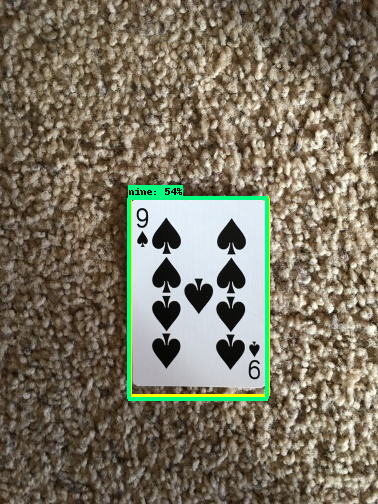

In [55]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/drive/MyDrive/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10-master/images/test/IMG_2391.JPG'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/exported_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/drive/MyDrive/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10-master/training/labelmap.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED
